In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [54]:
train_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
    "Model2Data - Copy",
    seed=41,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 5882 files belonging to 4 classes.


In [55]:
class_names_2 = train_ds_2.class_names
print("class_names: ",class_names_2)
print("number of classes: ", len(class_names_2))
train_ds_2 = train_ds_2.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

class_names:  ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
number of classes:  4


In [56]:
def tf_split_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=10)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_set = ds.take(train_size)
    val_set = ds.skip(train_size).take(val_size)
    test_set = ds.skip(train_size).skip(val_size)

    return train_set, val_set, test_set

train_ds_2, val_ds_2, test_ds_2 = tf_split_data(train_ds_2)

In [57]:
train_ds_2 = train_ds_2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_2 = val_ds_2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_2 = test_ds_2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

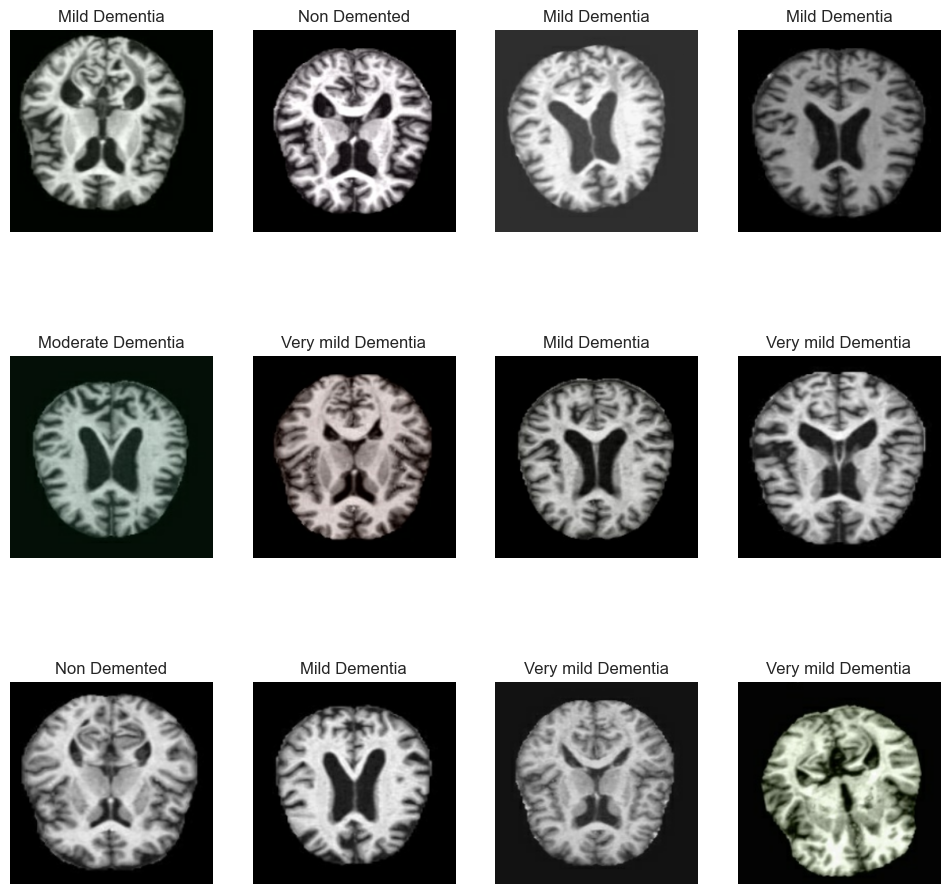

In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in train_ds_2.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("float32"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [50]:
from tensorflow.keras.applications import DenseNet121

base_model2 = DenseNet121(weights='imagenet', include_top=False, pooling=None, input_shape=(256, 256, 3))
for layer in base_model2.layers:
    layer.trainable = False
base_model2.trainable = False

model2 = models.Sequential([
    base_model2,

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(n_classes, activation='softmax')
])

model2.build(input_shape=input_shape)

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 8, 8, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,788,228 (33.52 MB)

 Trainable params: 1,749,828 (6.68 MB)

 Non-trainable params: 7,038,400 (26.85 MB)

In [51]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

historymodel222 = model2.fit(
    train_ds_2,
    batch_size=32,
    validation_data=val_ds_2,
    epochs=3,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9747 - loss: 0.0769 - val_accuracy: 0.8490 - val_loss: 0.6009 - learning_rate: 5.0000e-04
Epoch 2/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9710 - loss: 0.0810 - val_accuracy: 0.8403 - val_loss: 0.5577 - learning_rate: 5.0000e-04
Epoch 3/3
147/147 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9756 - loss: 0.0665 - val_accuracy: 0.9288 - val_loss: 0.2289 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 3.


In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

historymodel22 = model2.fit(
    train_ds_2,
    batch_size=32,
    validation_data=val_ds_2,
    epochs=7,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/7
147/147 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8101 - loss: 0.4884 - val_accuracy: 0.8316 - val_loss: 0.4544 - learning_rate: 0.0010
Epoch 2/7
147/147 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.8633 - loss: 0.3640 - val_accuracy: 0.8542 - val_loss: 0.3928 - learning_rate: 0.0010
Epoch 3/7
147/147 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.8631 - loss: 0.3342 - val_accuracy: 0.7882 - val_loss: 0.5614 - learning_rate: 0.0010
Epoch 4/7
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8807 - loss: 0.3059
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
147/147 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.8806 - loss: 0.3061 - val_accuracy: 0.7639 - val_loss: 0.7286 - learning_rate: 0.0010
Epoch 5/7
147/147 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9209 - loss: 0.1976 - val_accuracy: 0.8559 - val_loss: 0.3821 - learning_rate: 5.0000e-04
Epoch 6/7
147/147 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9560 - loss: 0.1189 

In [69]:
scores = model2.evaluate(test_ds_2)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9233 - loss: 0.2381


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


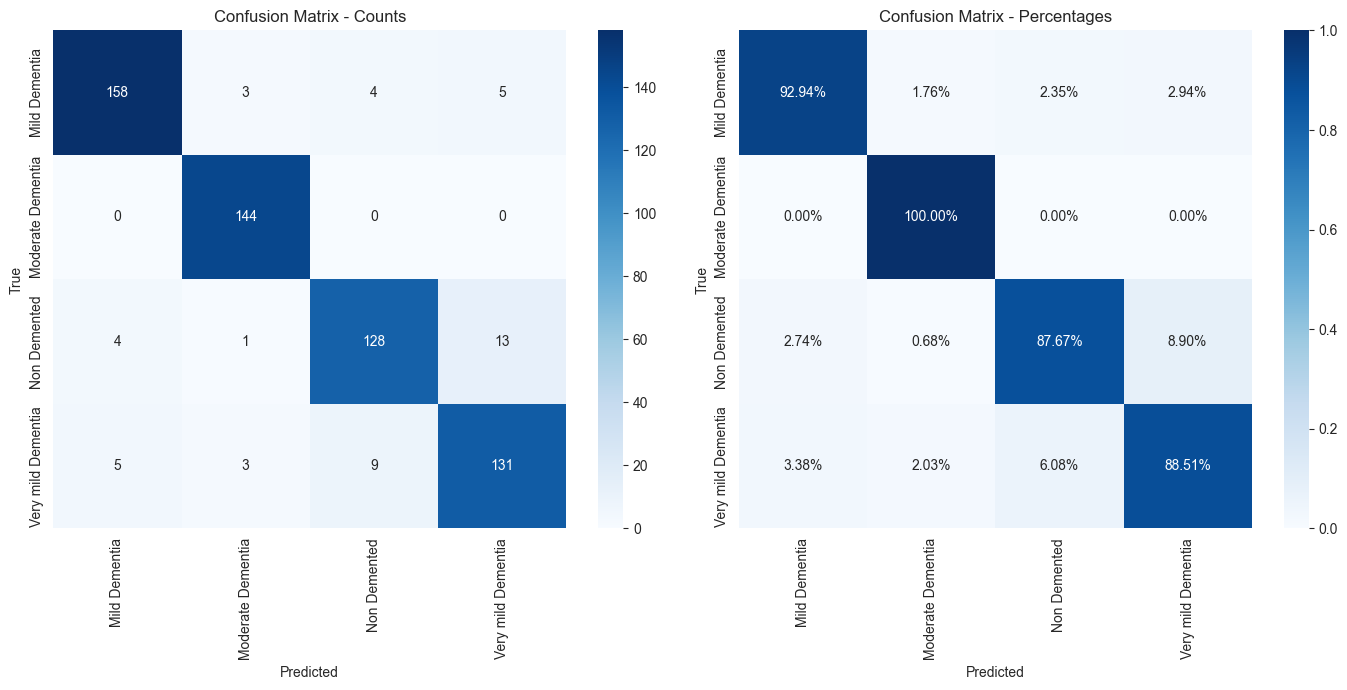

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def get_true_labels_and_predictions(model, dataset):
    true_labels = []
    predictions = []
    for batch in dataset:
        images, labels = batch
        preds = model.predict(images)
        true_labels.extend(labels.numpy())
        predictions.extend(np.argmax(preds, axis=1))
    return true_labels, predictions

true_labels, predicted_labels = get_true_labels_and_predictions(model2, test_ds_2)

cm = confusion_matrix(true_labels, predicted_labels)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Counts')


plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Percentages')

plt.tight_layout()
plt.show()

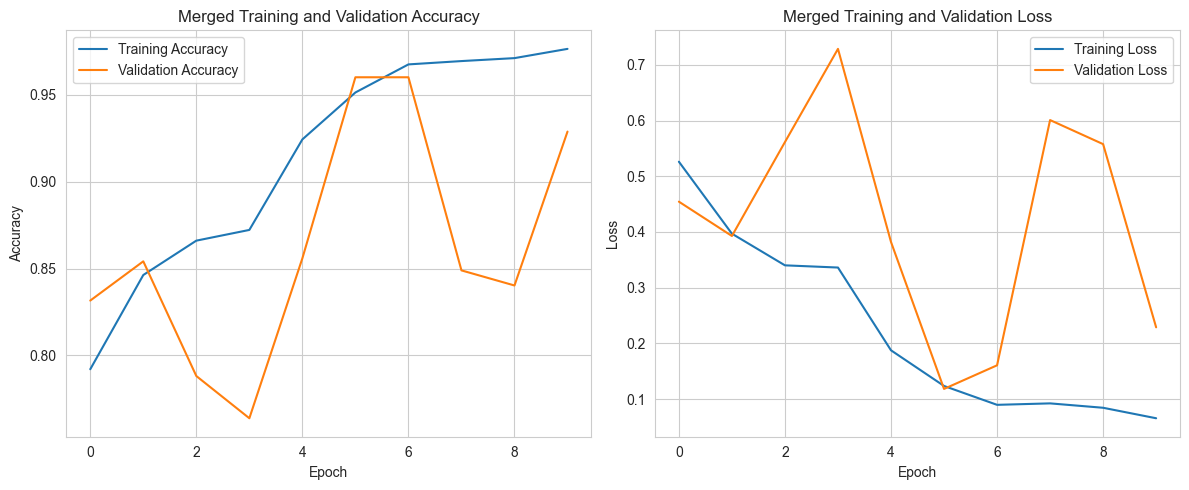

In [68]:
def merge_histories(hist1, hist2):
    merged_history = {}

    for key in hist1.history.keys():
        merged_history[key] = hist1.history[key] + hist2.history[key]  # concatenate lists

    return merged_history

# Merge histories
merged = merge_histories(historymodel22, historymodel222)

# Plot merged history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(merged['accuracy'], label='Training Accuracy')
plt.plot(merged['val_accuracy'], label='Validation Accuracy')
plt.title('Merged Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(merged['loss'], label='Training Loss')
plt.plot(merged['val_loss'], label='Validation Loss')
plt.title('Merged Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [74]:
from tensorflow.keras.models import Model
print(model2.inputs)
feature_extractor_layer = model2.layers[-5].output
feature_extractor2 = Model(inputs=model2.inputs, outputs=model2.layers[-8].output)

def extract_features2(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        features = feature_extractor2.predict(images)
        features = features.reshape(features.shape[0], -1)
        all_features.append(features)
        all_labels.extend(labels.numpy())
    return np.vstack(all_features), np.array(all_labels)

train_features2, train_labels2 = extract_features2(train_ds_2)
val_features2, val_labels2 = extract_features2(val_ds_2)
test_features2, test_labels2 = extract_features2(test_ds_2)



[<KerasTensor shape=(None, 256, 256, 3), dtype=float32, sparse=None, name=keras_tensor_2700>]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━

In [75]:
model2.save("2dCNN222augmmodel2.keras")

In [79]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()
train_frame2 = h2o.H2OFrame(np.hstack((train_features2, train_labels2.reshape(-1, 1))),
                           column_names=[f'feature_{i}' for i in range(train_features2.shape[1])] + ['label'])
val_frame2 = h2o.H2OFrame(np.hstack((val_features2, val_labels2.reshape(-1, 1))),
                         column_names=[f'feature_{i}' for i in range(val_features2.shape[1])] + ['label'])
test_frame2 = h2o.H2OFrame(np.hstack((test_features2, test_labels2.reshape(-1, 1))),
                          column_names=[f'feature_{i}' for i in range(test_features2.shape[1])] + ['label'])

train_frame2['label'] = train_frame2['label'].asfactor()
val_frame2['label'] = val_frame2['label'].asfactor()
test_frame2['label'] = test_frame2['label'].asfactor()

automl2 = H2OAutoML(max_models=20, seed=1, max_runtime_secs=3600)
automl2.train(x=train_frame2.columns[:-1], y='label', training_frame=train_frame2, validation_frame=val_frame2)

print(automl2.leaderboard)

Checking whether there is an H2O instance running at http://localhost:54321.


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/Athens
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"1 year, 2 months and 19 days"
H2O_cluster_name:,H2O_from_python_casap_rvvupf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.663 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
17:52:50.817: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
17:52:50.820: AutoML: XGBoost is not available; skipping it.
17:52:50.838: _train param, Dropping bad and constant columns: [feature_95, feature_177, feature_536, feature_811, feature_91, feature_332, feature_696, feature_411, feature_492, feature_572, feature_817, feature_735, feature_146, feature_64, feature_542, feature_982, feature_104, feature_182, feature_27, feature_582, feature_508, feature_629, feature_705, fea

In [80]:
performance2 = automl2.leader.model_performance(test_frame2)
print(performance2)
predictions2 = automl2.leader.predict(test_frame2)
confusion_matrix2 = predictions2['predict'].cbind(test_frame2['label']).table()
print(confusion_matrix)

model_path = h2o.save_model(model=automl2.leader, path="./", force=True)
print("Model saved to: " + model_path)

ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.030151419813029233
RMSE: 0.1736416419325423
LogLoss: 0.1399207682354334
Null degrees of freedom: 607
Residual degrees of freedom: 581
Null deviance: 1686.3446645523127
Residual deviance: 170.14365417428698
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    Error      Rate
---  ---  ---  ---  ---------  --------
167  0    2    1    0.0176471  3 / 170
0    144  0    0    0          0 / 144
2    0    141  3    0.0342466  5 / 146
4    0    8    136  0.0810811  12 / 148
173  144  151  140  0.0328947  20 / 608

Top-4 Hit Ratios: 
k    hit_rat

C:\Users\casap\AppData\Local\Programs\Python\Python312\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


predict          0      1          2          3
label                                          
0        98.235294    0.0   1.176471   0.588235
1         0.000000  100.0   0.000000   0.000000
2         1.369863    0.0  96.575342   2.054795
3         2.702703    0.0   5.405405  91.891892


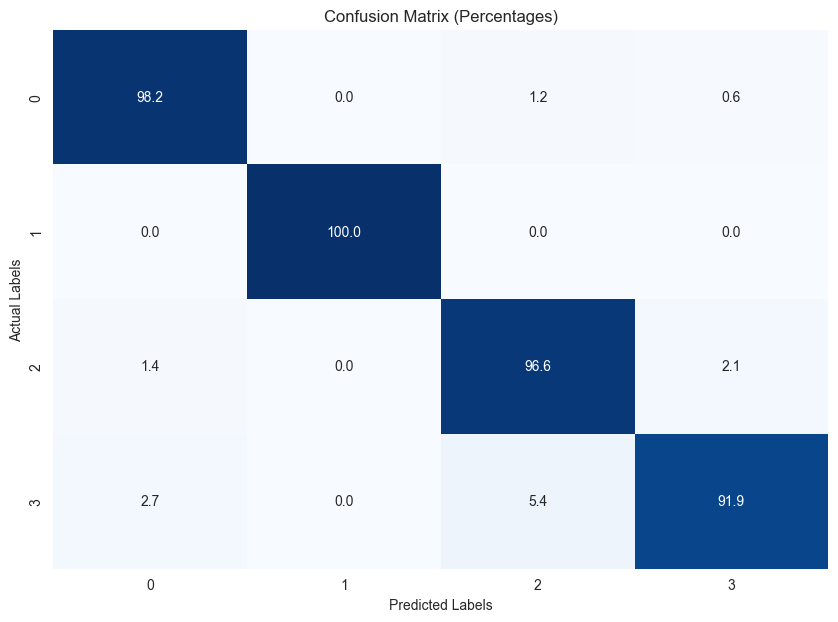

In [81]:
import pandas as pd

confusion_matrix_df2 = confusion_matrix2.as_data_frame(use_pandas=True)

pivot_cm2 = pd.pivot_table(confusion_matrix_df2, values='Counts', index='label', columns='predict', fill_value=0)

all_classes = sorted(set(pivot_cm2.columns).union(set(pivot_cm2.index)))
pivot_cm2 = pivot_cm2.reindex(index=all_classes, columns=all_classes, fill_value=0)


row_totals = pivot_cm2.sum(axis=1)
percentage_cm2 = pivot_cm2.div(row_totals, axis=0) * 100


print(percentage_cm2)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(percentage_cm2, annot=True, fmt=".1f", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Percentages)")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [3]:
loaded_model2 = h2o.load_model("StackedEnsemble_AllModels_1_AutoML_2_20250601_175250")
# augmented data
loaded_model2.summary()

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/20
# GBM base models (used / total),0/10
# DeepLearning base models (used / total),7/8
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None
